# convolutional
## quantum neural networks experimentation

### index
1. [imports](#imports)
2. [data](#data)
3. [classical classification](#classical-classification)

### imports <a class="anchor" id="imports"></a>

In [2]:
# utils imports
import json
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
# classical imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# quantum imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
#constants
algorithm_globals.random_seed = 33

### data <a class="anchor" id="data"></a>

In [45]:
def generate_dataset(num_images):
    images = []
    labels = []
    hor_array = np.zeros((6, 8))
    ver_array = np.zeros((4, 8))

    j = 0
    for i in range(0, 7):
        if i != 3:
            hor_array[j][i] = np.pi / 2
            hor_array[j][i + 1] = np.pi / 2
            j += 1

    j = 0
    for i in range(0, 4):
        ver_array[j][i] = np.pi / 2
        ver_array[j][i + 4] = np.pi / 2
        j += 1

    for n in range(num_images):
        rng = algorithm_globals.random.integers(0, 2)
        if rng == 0:
            labels.append(-1)
            random_image = algorithm_globals.random.integers(0, 6)
            images.append(np.array(hor_array[random_image]))
        elif rng == 1:
            labels.append(1)
            random_image = algorithm_globals.random.integers(0, 4)
            images.append(np.array(ver_array[random_image]))

        # Create noise
        for i in range(8):
            if images[-1][i] == 0:
                images[-1][i] = algorithm_globals.random.uniform(0, np.pi / 4)
    return images, labels

In [46]:
images, labels = generate_dataset(50)

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=33
)

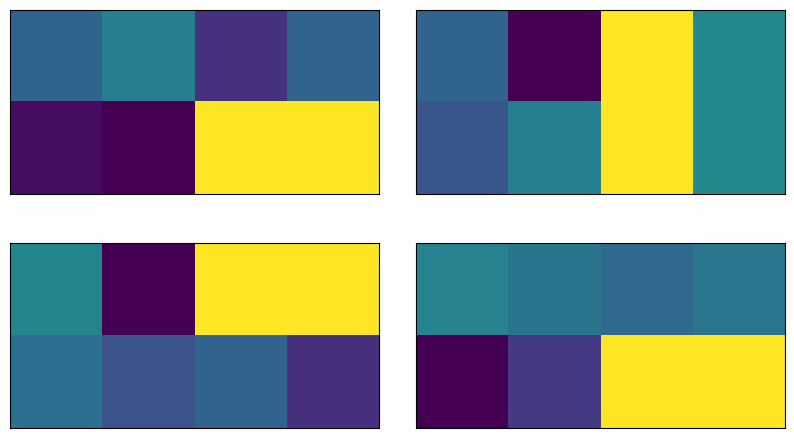

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(4):
    ax[i // 2, i % 2].imshow(
        train_images[i].reshape(2, 4),  # Change back to 2 by 4
        aspect="equal",
    )
plt.subplots_adjust(wspace=0.1, hspace=0.025)

### classical <a class="anchor" id="classical-classification"></a>

In [61]:
train_images = np.array(train_images).reshape(-1, 2, 4, 1)
test_images = np.array(test_images).reshape(-1, 2, 4, 1)

tf_train = np.zeros(len(train_images), dtype=object)
tf_test = np.zeros(len(test_images), dtype=object)
#transform images to tensors
for i in range(len(train_images)):
    tf_train[i] = tf.convert_to_tensor(train_images[i])
for i in range(len(test_images)):
    tf_test[i] = tf.convert_to_tensor(test_images[i])



ValueError: Unrecognized data type: x=[<tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.64193487],
         [0.78514515],
         [0.39719085],
         [0.63753525]],

        [[0.24476077],
         [0.19991429],
         [1.57079633],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.52853654],
         [0.03084328],
         [1.57079633],
         [0.75563039]],

        [[0.44101092],
         [0.69474946],
         [1.57079633],
         [0.76889852]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.73629723],
         [0.03840387],
         [1.57079633],
         [1.57079633]],

        [[0.59637217],
         [0.43236171],
         [0.5268925 ],
         [0.2491925 ]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.75352811],
         [0.67609185],
         [0.60670115],
         [0.67839446]],

        [[0.10292263],
         [0.35204326],
         [1.57079633],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.56408843],
         [0.03885146],
         [0.61909936],
         [0.1273198 ]],

        [[0.23943951],
         [1.57079633],
         [1.57079633],
         [0.1542062 ]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [0.20290681],
         [0.71251432],
         [0.18284569]],

        [[1.57079633],
         [0.59110532],
         [0.24466882],
         [0.65987228]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.51332391],
         [1.57079633],
         [1.57079633],
         [0.10015039]],

        [[0.65217969],
         [0.70089622],
         [0.77524914],
         [0.36564412]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [0.1736939 ],
         [0.72812423],
         [0.24399217]],

        [[1.57079633],
         [0.08964963],
         [0.33220272],
         [0.01474758]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.67920291],
         [0.08034039],
         [0.57427935],
         [0.13692647]],

        [[1.57079633],
         [1.57079633],
         [0.59607976],
         [0.61502078]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.63334907],
         [0.73737401],
         [0.26739848],
         [0.03190681]],

        [[1.57079633],
         [1.57079633],
         [0.50669993],
         [0.31227032]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [1.57079633],
         [0.72204942],
         [0.0809167 ]],

        [[0.3132335 ],
         [0.03516153],
         [0.76877385],
         [0.46823678]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [1.57079633],
         [0.72642176],
         [0.34977186]],

        [[0.25924964],
         [0.50687382],
         [0.59702578],
         [0.22644354]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.05575307],
         [0.35582962],
         [0.16317819],
         [0.26920396]],

        [[0.05434069],
         [0.33973664],
         [1.57079633],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.44070146],
         [0.16033248],
         [0.25099283],
         [0.74875472]],

        [[0.37396846],
         [1.57079633],
         [1.57079633],
         [0.68044592]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.22283354],
         [0.17223424],
         [0.23250394],
         [1.57079633]],

        [[0.10873701],
         [0.30157817],
         [0.24608077],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.58370911],
         [1.57079633],
         [1.57079633],
         [0.72364617]],

        [[0.08917027],
         [0.52948529],
         [0.64734803],
         [0.52486472]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.69881695],
         [1.57079633],
         [1.57079633],
         [0.23336996]],

        [[0.16170791],
         [0.56965357],
         [0.01689397],
         [0.29801247]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633e+00],
         [2.02291069e-01],
         [4.97505881e-01],
         [7.55013891e-01]],

        [[1.57079633e+00],
         [5.24395053e-04],
         [3.05936397e-01],
         [6.46666425e-01]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.65273184],
         [0.28859408],
         [0.45748172],
         [0.19589909]],

        [[0.03701797],
         [1.57079633],
         [1.57079633],
         [0.26880884]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.68157384],
         [0.02558332],
         [0.60670357],
         [0.68496168]],

        [[0.70335851],
         [1.57079633],
         [1.57079633],
         [0.00222999]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.48049636],
         [0.01258705],
         [1.57079633],
         [1.57079633]],

        [[0.69825333],
         [0.04388205],
         [0.07467461],
         [0.37125472]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.17574871],
         [1.57079633],
         [0.51636288],
         [0.52684428]],

        [[0.38670587],
         [1.57079633],
         [0.32501995],
         [0.42873194]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [1.57079633],
         [0.54044533],
         [0.7797368 ]],

        [[0.37531352],
         [0.42423423],
         [0.3172854 ],
         [0.67443073]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.0732586 ],
         [0.34179775],
         [0.15672109],
         [1.57079633]],

        [[0.67652392],
         [0.61177752],
         [0.7153515 ],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.59791951],
         [0.13835907],
         [0.36571348],
         [0.7448912 ]],

        [[1.57079633],
         [1.57079633],
         [0.40209436],
         [0.16175596]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [1.57079633],
         [0.48561305],
         [0.63938397]],

        [[0.77690954],
         [0.3389005 ],
         [0.25651387],
         [0.71031475]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [1.57079633],
         [0.15655917],
         [0.12968966]],

        [[0.41209842],
         [0.52182102],
         [0.03524393],
         [0.17759422]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.18286932],
         [1.57079633],
         [0.05693288],
         [0.54701647]],

        [[0.28878147],
         [1.57079633],
         [0.17293734],
         [0.55613583]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.01320975],
         [0.77601188],
         [0.3847143 ],
         [0.32383651]],

        [[0.25875069],
         [0.29160877],
         [1.57079633],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.50193584],
         [0.75135722],
         [1.57079633],
         [1.57079633]],

        [[0.49975389],
         [0.49914088],
         [0.20893373],
         [0.29518584]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[1.57079633],
         [0.05913598],
         [0.03277845],
         [0.07510648]],

        [[1.57079633],
         [0.18352041],
         [0.20535442],
         [0.47909538]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.05853235],
         [0.02366248],
         [0.20690563],
         [1.57079633]],

        [[0.29254528],
         [0.49212881],
         [0.14401897],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.06413882],
         [0.65822681],
         [0.65591028],
         [0.19205355]],

        [[0.1173601 ],
         [0.76888569],
         [1.57079633],
         [1.57079633]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.05773421],
         [0.61852094],
         [1.57079633],
         [1.57079633]],

        [[0.63555679],
         [0.20293196],
         [0.64818303],
         [0.6959261 ]]])>
 <tf.Tensor: shape=(2, 4, 1), dtype=float64, numpy=
 array([[[0.57532167],
         [0.42125271],
         [0.56570184],
         [1.57079633]],

        [[0.03880042],
         [0.01941171],
         [0.28401894],
         [1.57079633]]])>                          ] (of type <class 'numpy.ndarray'>)

### quantum <a class="anchor" id="quantum-classification"></a>

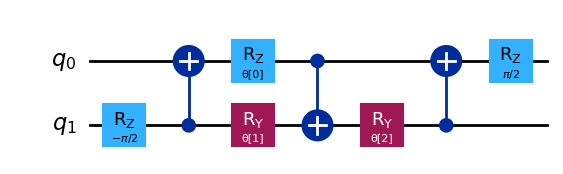

In [5]:
# we define the parametrized convolutional unitary gate
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target

# we draw the circuit
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl", style="iqx")

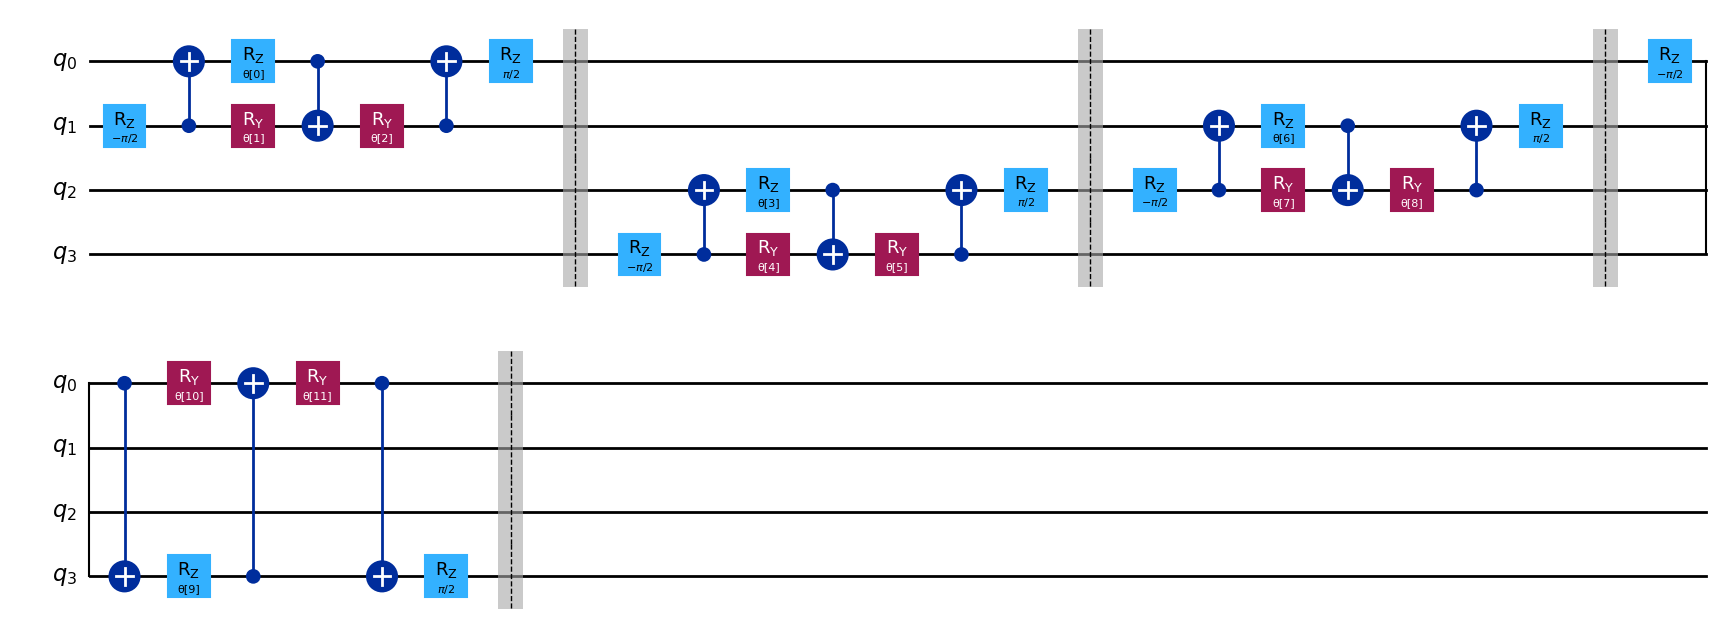

In [6]:
# we define the convolutional layer
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl", style="iqx")

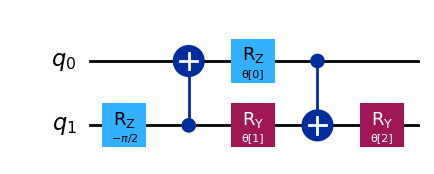

In [7]:
# we define the parametrized pooling unitary gate
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl", style="iqx")

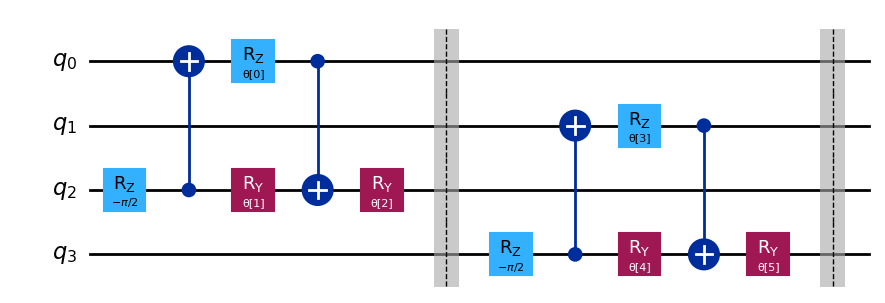

In [8]:
# we define the pooling layer
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl", style="iqx")

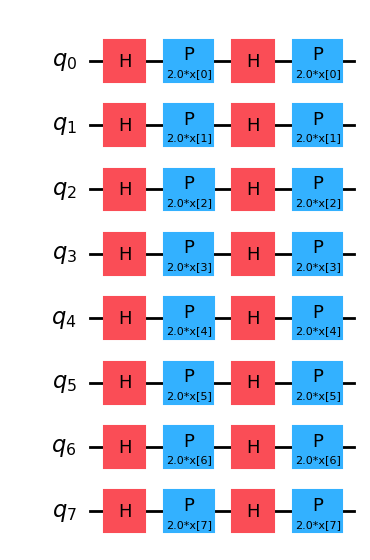

In [9]:
# we define our feature map
feature_map = ZFeatureMap(8)
feature_map.decompose().draw("mpl", style="iqx")

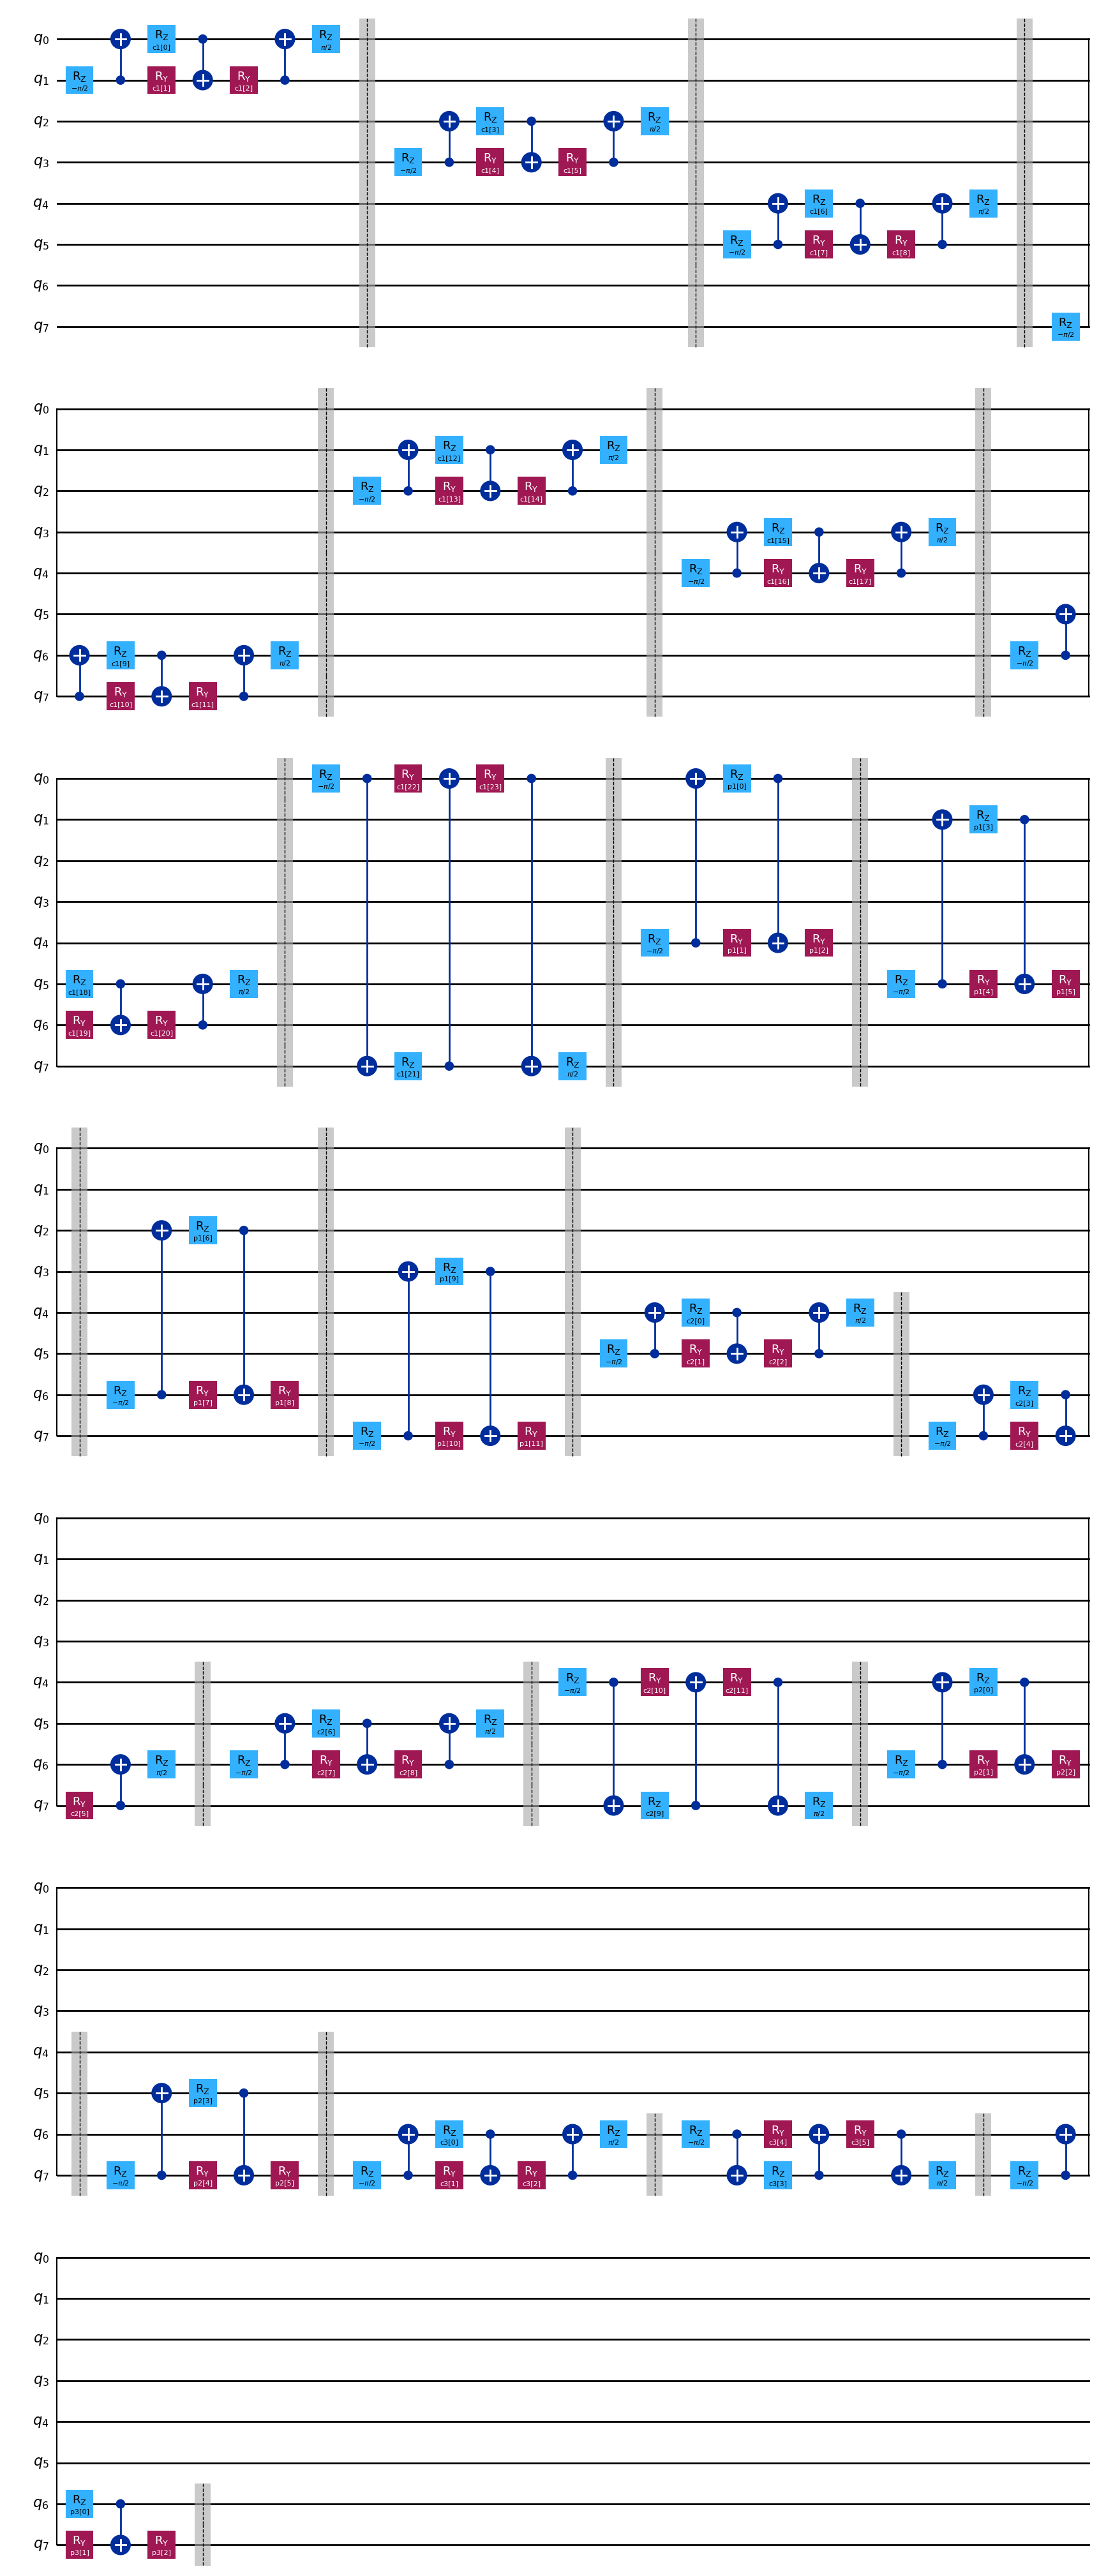

In [10]:
# we define the ansatz
ansatz = QuantumCircuit(8, name="Ansatz")

# first convolutional layer
ansatz.compose(conv_layer(8, "c1"), list(range(8)), inplace=True)
# first pooling layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)
# second convolutional layer
ansatz.compose(conv_layer(4, "c2"), list(range(4,8)), inplace=True)
# second pooling layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)
# third convolutional layer
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)
# third pooling layer
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# we draw the ansatz
ansatz.decompose().draw("mpl", style="iqx")

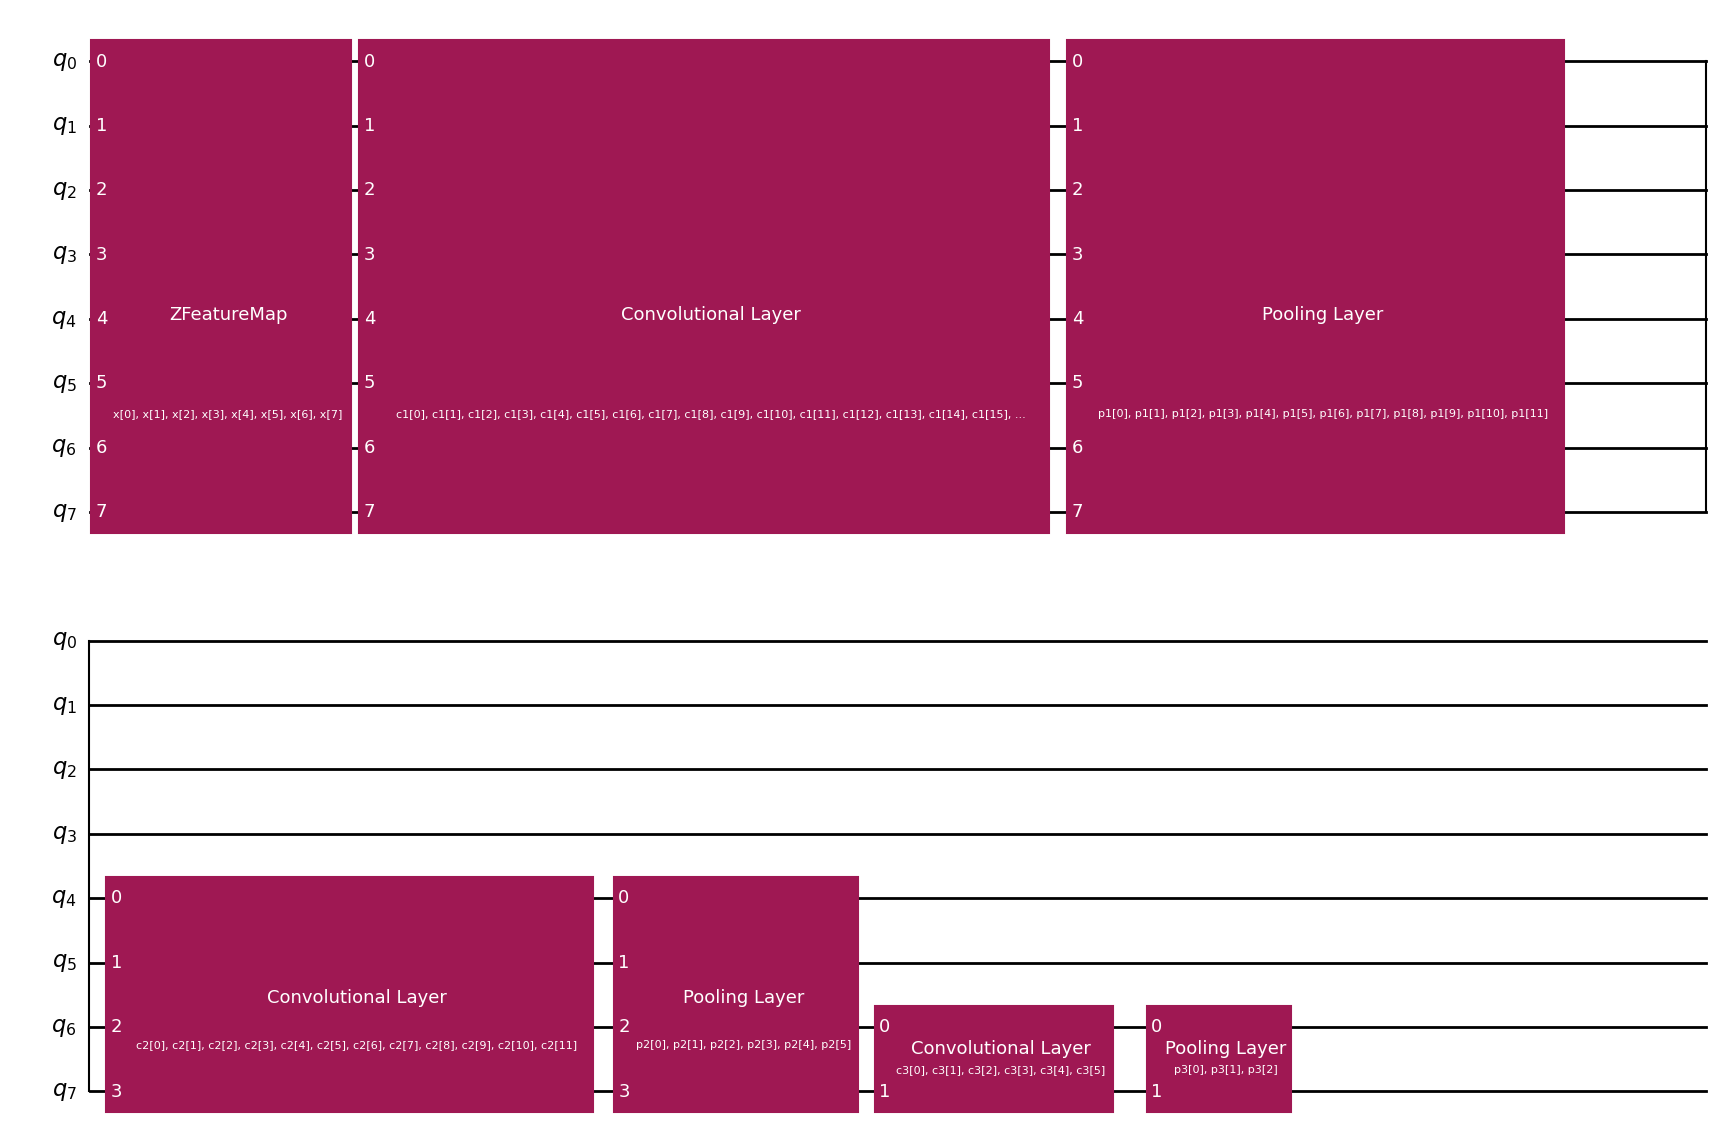

In [11]:
# we define the quantum convolutional neural network
circuit = QuantumCircuit(8)
circuit.compose(feature_map, range(8), inplace=True)
circuit.compose(ansatz, range(8), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

circuit.draw("mpl", style="iqx")

In [12]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("objective function value against iteration")
    plt.xlabel("iteration")
    plt.ylabel("objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [14]:
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=100),  # Set max iterations here
    callback=callback_graph,
)

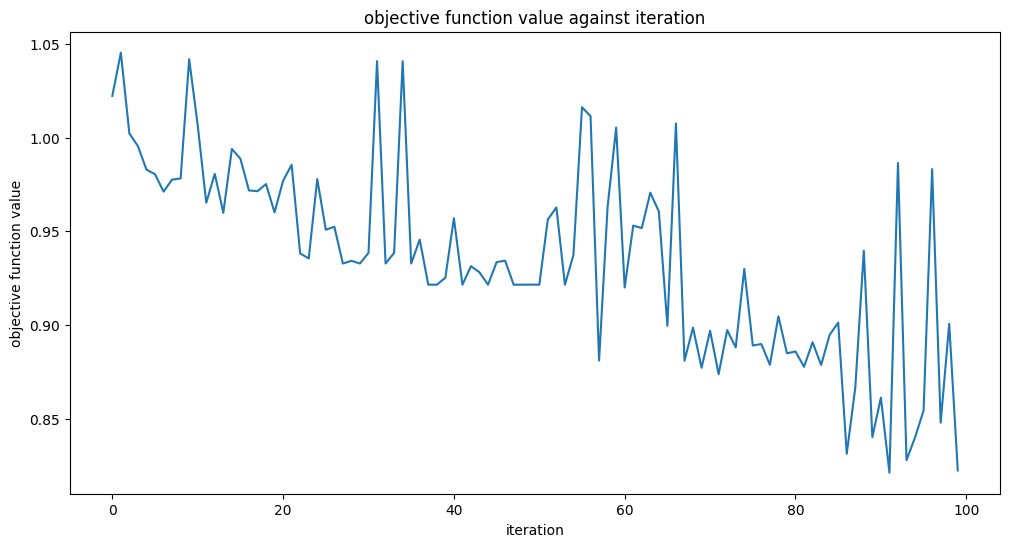

In [15]:
x = np.asarray(train_images)
y = np.asarray(train_labels)

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
classifier.fit(x, y)

In [16]:
print(f"accuracy from the train data : {np.round(100 * classifier.score(x, y), 2)}%")

accuracy from the train data : 77.14%


Accuracy from the test data : 60.0%


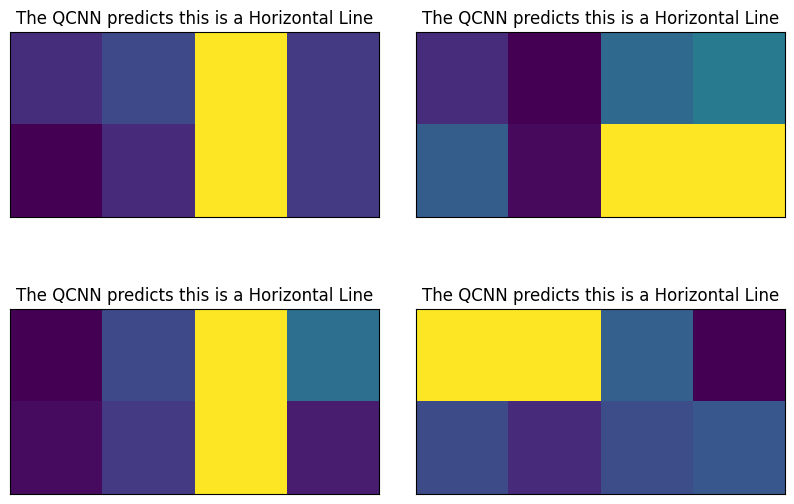

In [17]:
y_predict = classifier.predict(test_images)
x = np.asarray(test_images)
y = np.asarray(test_labels)
print(f"Accuracy from the test data : {np.round(100 * classifier.score(x, y), 2)}%")

# Let's see some examples in our dataset
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(0, 4):
    ax[i // 2, i % 2].imshow(test_images[i].reshape(2, 4), aspect="equal")
    if y_predict[i] == -1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Horizontal Line")
    if y_predict[i] == +1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is a Vertical Line")
plt.subplots_adjust(wspace=0.1, hspace=0.5)


In [18]:
# export the weights to a json file
weights = classifier.weights
with open("weights.json", "w") as file:
    json.dump(weights, file)


TypeError: Object of type ndarray is not JSON serializable